In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import model_selection

In [40]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [41]:
from sklearn.neural_network import MLPClassifier

In [98]:
data = pd.read_csv('sky_no_dark_.csv')

In [99]:
def get_clusters(X):
    """
    Find clusters of the weather data.
    """
    model = make_pipeline(
        KMeans(n_clusters=2)
    )
    model.fit(X)
    return model.predict(X)


In [103]:
def get_pca(X):
    """
    Transform data to 2D points for plotting. Should return an array with shape (n, 2).
    """
    flatten_model = make_pipeline(
        MinMaxScaler(),
        PCA(n_components=250)
    )
    X2 = flatten_model.fit_transform(X)
    assert X2.shape == (X.shape[0], 250)
    return X2

In [117]:
data.groupby(data.iloc[-1])
data.agg(
    data
)

In [110]:
X = data.iloc[0:,1:-1]
y = data.iloc[0:,-1]
y = np.array(y)
X = np.array(X.values)
X2 = get_pca(X)
X2 = X


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [111]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X2, y)

In [112]:
arr = []
for i in range (1,100,5):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train) 
    arr.append(KNN.score(X_test,y_test))
print(max(arr))

0.568507157464


In [113]:
arr2 = []
clf = GaussianNB()
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))

0.447852760736


In [109]:
arr = []
for i in range (1,200,10):
    svc_rgb = SVC(C=i)
    svc_rgb.fit(X_train, y_train) 
    arr.append(svc_rgb.score(X_test,y_test))
print (arr)

[0.55419222903885479, 0.59304703476482623, 0.58895705521472397, 0.59304703476482623, 0.58895705521472397, 0.58895705521472397, 0.59304703476482623, 0.60122699386503065, 0.59304703476482623, 0.58486707566462171, 0.58895705521472397, 0.58486707566462171, 0.58895705521472397, 0.58486707566462171, 0.58077709611451944, 0.57873210633946826, 0.57668711656441718, 0.5746421267893661, 0.57259713701431492, 0.57259713701431492]


In [59]:
svc_rgb = SVC(C=51)
svc_rgb.fit(X_train, y_train) 
errors = []
pred = svc_rgb.predict(X_test)
for i in range(0,len(y_test)):
    if(pred[i] != y_test[i]):
        errors.append([pred[i],y_test[i]])
print(errors)

[['Cloudy', 'Rain'], ['Rain', 'Cloudy'], ['Rain', 'Cloudy'], ['Cloudy', 'Rain'], ['Mostly Cloudy', 'Clear'], ['Rain', 'Cloudy'], ['Mostly Cloudy', 'Cloudy'], ['Clear', 'Mostly Cloudy'], ['Mostly Cloudy', 'Clear'], ['Cloudy', 'Rain'], ['Cloudy', 'Rain'], ['Cloudy', 'Mostly Cloudy'], ['Rain', 'Cloudy'], ['Clear', 'Rain'], ['Mostly Cloudy', 'Clear'], ['Clear', 'Mostly Cloudy'], ['Mostly Cloudy', 'Clear'], ['Cloudy', 'Rain'], ['Mostly Cloudy', 'Cloudy'], ['Mostly Cloudy', 'Cloudy'], ['Cloudy', 'Mostly Cloudy'], ['Rain', 'Cloudy'], ['Rain', 'Snow'], ['Cloudy', 'Rain'], ['Rain', 'Cloudy'], ['Cloudy', 'Rain'], ['Cloudy', 'Rain'], ['Clear', 'Mostly Cloudy'], ['Mostly Cloudy', 'Rain'], ['Clear', 'Mostly Cloudy'], ['Rain', 'Cloudy'], ['Cloudy', 'Mostly Cloudy'], ['Cloudy', 'Rain'], ['Cloudy', 'Mostly Cloudy'], ['Snow', 'Cloudy'], ['Rain', 'Cloudy'], ['Clear', 'Mostly Cloudy'], ['Cloudy', 'Rain'], ['Mostly Cloudy', 'Clear'], ['Rain', 'Mostly Cloudy'], ['Cloudy', 'Mostly Cloudy'], ['Rain', 'Cloudy

In [81]:
X_cloudy  = np.array(data[data.iloc[0:,-1] == 'Cloudy'].iloc[0:,1:-1])
X_rain  = np.array(data[data.iloc[0:,-1] == 'Rain'].iloc[0:,1:-1])


In [87]:
np.shape(X_cloudy)

(432, 1800)

In [82]:
frame = np.concatenate((X_cloudy,X_rain),axis = 0)
frame = get_pca(frame)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [91]:
print(frame)

[[-2.67509309  1.44869088]
 [ 2.68193811 -1.67992168]
 [-0.78799622 -0.83846319]
 ..., 
 [-7.6858219   0.4625438 ]
 [-5.20376887 -0.27160735]
 [-4.89608169  0.06873514]]


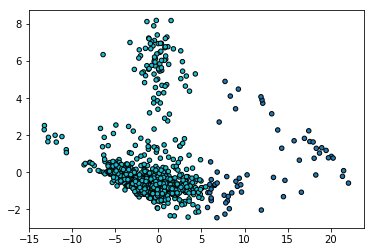

In [97]:
clusters = get_clusters(frame)
plt.scatter(frame[:,0], frame[:,1], c=clusters, cmap='tab10', edgecolor='k', s=20)
plt.figure(figsize=(50,50))
plt.show()
##plt.savefig('clusters.png')
